In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from data.dataLoader import h5_data_loader
from PCAutil.utilities import loading_matrix, biplot

# BE residual analysis - raw

In [52]:
models = ['SKMS', 'SKP', 'SLY4', 'SV', 'UNEDF0', 'UNEDF1', 'UNEDF2', 'FRDM12', 'HFB24', 'BCPM', 'D1M']
observable = "BE"
BE_data = h5_data_loader(models, observable, residuals = True)

model_summary = {}
model_summary["res_mean"] = BE_data[models].mean(axis = 0).values
model_summary["res_std"] = BE_data[models].std(axis = 0).values
model_summary["rmse"] = np.sqrt(np.mean(BE_data[models] ** 2, axis = 0)).values

model_summary_df = pd.DataFrame(model_summary, index =BE_data[models].columns )
print(model_summary_df)
#print(model_summary_df.style.to_latex())

        res_mean   res_std      rmse
SKMS    1.604438  7.220357  7.335457
SKP     1.293901  3.714584  3.903129
SLY4    4.578626  4.879360  6.660442
SV      2.495305  2.399154  3.447208
UNEDF0  0.098178  1.493604  1.483923
UNEDF1  1.068468  2.088348  2.329727
UNEDF2  0.672142  2.090892  2.179043
FRDM12 -0.102253  0.709965  0.711207
HFB24   0.051537  0.591316  0.588458
BCPM    1.234439  1.453813  1.897622
D1M     4.841989  1.659793  5.113930


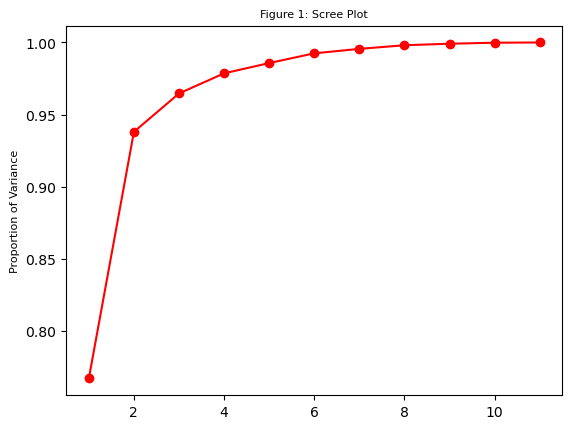

In [53]:
pca = PCA(n_components=len(models))
X_pca = pca.fit_transform(BE_data[models])

prop_var = np.cumsum(pca.explained_variance_ratio_)
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.savefig("Scree_BE_raw.pdf", format="pdf", bbox_inches="tight")
plt.show()

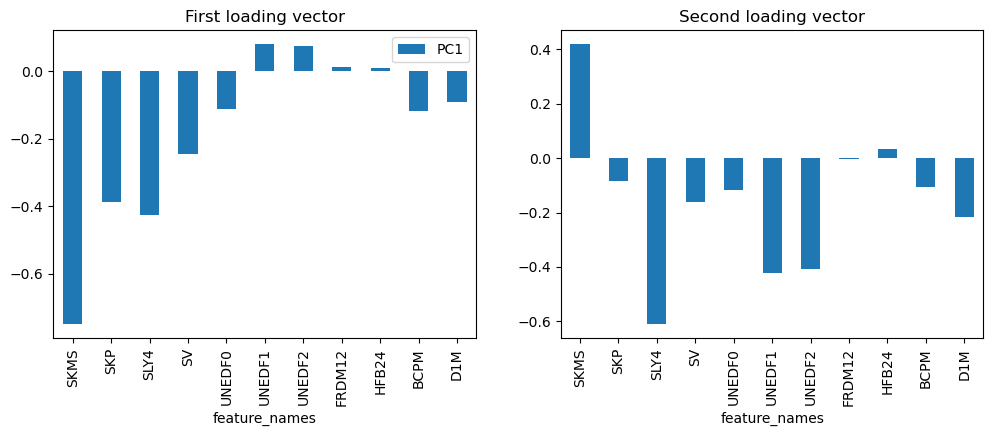

In [54]:
loadings = loading_matrix(pca.components_, pca.n_features_, models)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
loadings.iloc[:, :1].plot(kind = "bar", title = "First loading vector", ax = ax1)
loadings.iloc[:, 1].plot(kind = "bar", title = "Second loading vector", ax = ax2)
plt.savefig("PC_BE_raw.pdf", format="pdf", bbox_inches="tight")
plt.show()

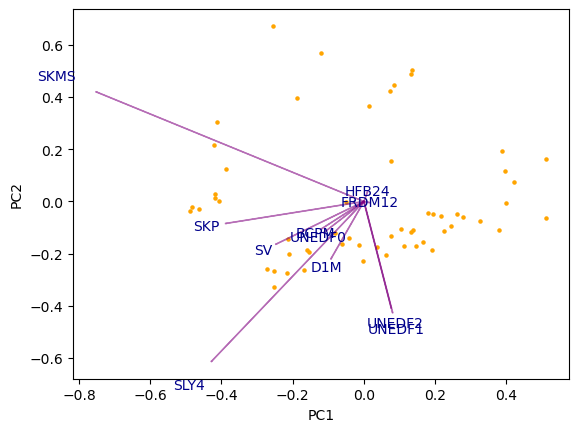

In [55]:
biplot(X_pca, np.transpose(pca.components_),list(loadings.index))
plt.savefig("Biplot_BE_raw.pdf", format="pdf", bbox_inches="tight")
plt.show()

# BE residual analysis - normalized

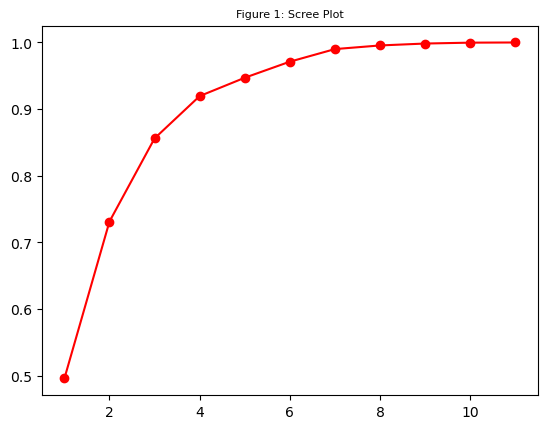

In [56]:
pca = PCA(n_components=len(models))
X_scaled = StandardScaler().fit_transform(BE_data[models])
X_pca = pca.fit_transform(X_scaled)

prop_var = np.cumsum(pca.explained_variance_ratio_)

PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.savefig("Scree_BE_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()

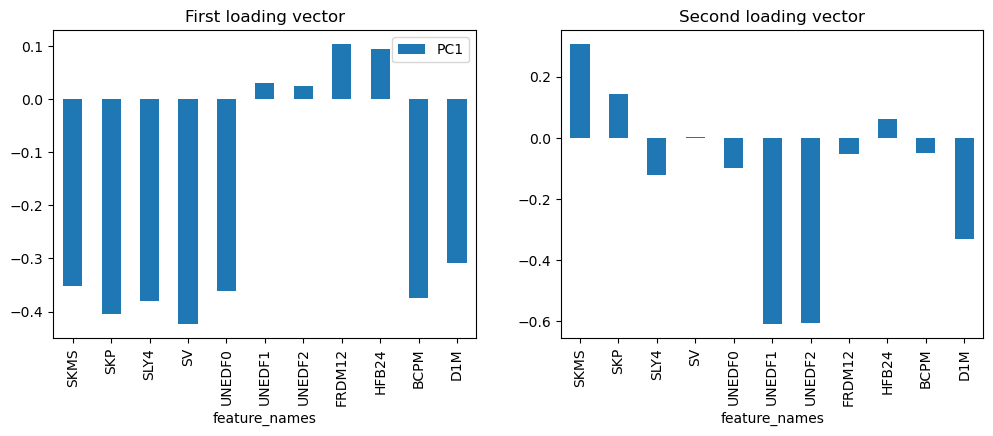

In [57]:
loadings = loading_matrix(pca.components_, pca.n_features_, models)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
loadings.iloc[:, :1].plot(kind = "bar", title = "First loading vector", ax = ax1)
loadings.iloc[:, 1].plot(kind = "bar", title = "Second loading vector", ax = ax2)
plt.savefig("PC_BE_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()

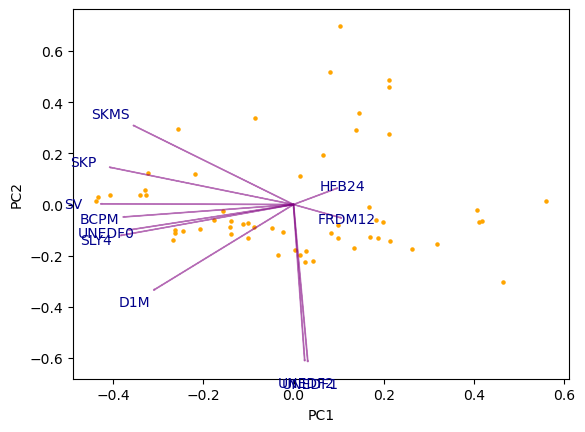

In [58]:
biplot(X_pca, np.transpose(pca.components_),list(loadings.index))
plt.savefig("Biplot_BE_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()

# TwoPSE residual analysis - raw

In [59]:
models = ['SKMS', 'SKP', 'SLY4', 'SV', 'UNEDF0', 'UNEDF1', 'UNEDF2', 'FRDM12', 'HFB24', 'BCPM', 'D1M']
observable = "TwoPSE"
PSE_data = h5_data_loader(models, observable, residuals = True)
PSE_data = PSE_data.dropna()

model_summary = {}
model_summary["res_mean"] = PSE_data[models].mean(axis = 0).values
model_summary["res_std"] = PSE_data[models].std(axis = 0).values
model_summary["rmse"] = np.sqrt(np.mean(PSE_data[models] ** 2, axis = 0)).values

model_summary_df = pd.DataFrame(model_summary, index =PSE_data[models].columns )
print(model_summary_df)
#print(model_summary_df.style.to_latex())

        res_mean   res_std      rmse
SKMS    2.028297  1.206456  2.354568
SKP     0.705092  0.746530  1.022098
SLY4   -0.068257  0.684996  0.682383
SV      0.457275  0.634463  0.777549
UNEDF0  0.466418  0.823598  0.940191
UNEDF1 -0.334413  0.471503  0.574671
UNEDF2 -0.299608  0.513911  0.590962
FRDM12  0.177423  0.475258  0.503375
HFB24   0.190155  0.458364  0.492514
BCPM    0.394178  0.664603  0.767674
D1M     0.067908  0.640514  0.638493


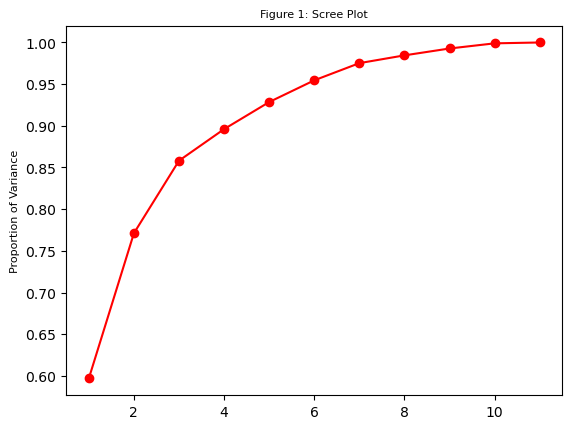

In [60]:
pca = PCA(n_components=len(models))
X_pca = pca.fit_transform(PSE_data[models])

prop_var = np.cumsum(pca.explained_variance_ratio_)
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.savefig("Scree_TwoPSE_raw.pdf", format="pdf", bbox_inches="tight")
plt.show()

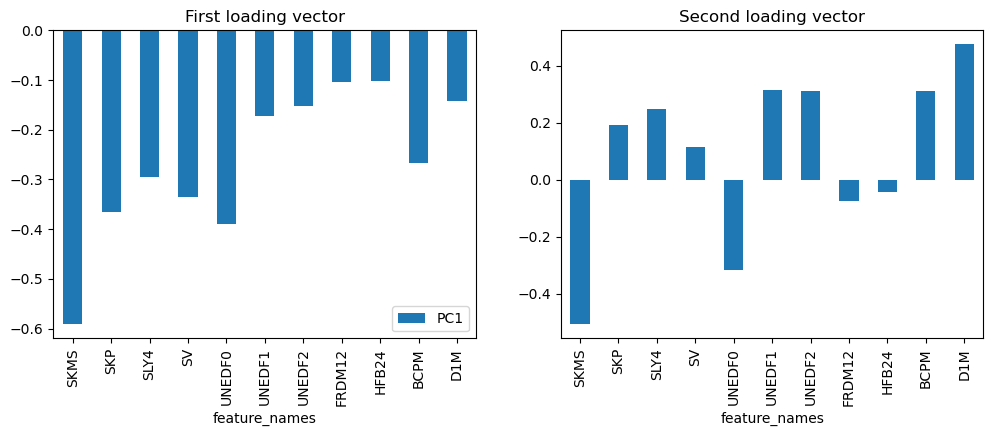

In [61]:
loadings = loading_matrix(pca.components_, pca.n_features_, models)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
loadings.iloc[:, :1].plot(kind = "bar", title = "First loading vector", ax = ax1)
loadings.iloc[:, 1].plot(kind = "bar", title = "Second loading vector", ax = ax2)
plt.savefig("PC_TwoPSE_raw.pdf", format="pdf", bbox_inches="tight")
plt.show()

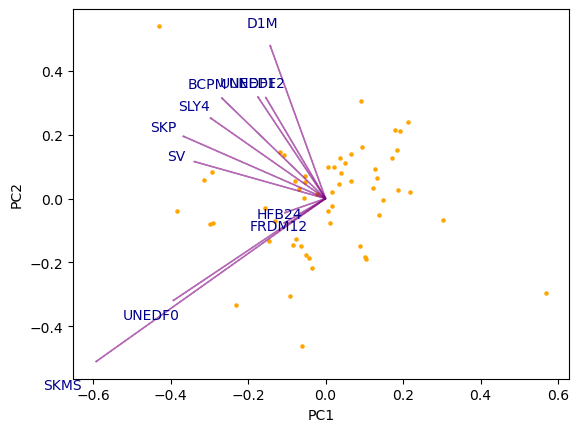

In [62]:
biplot(X_pca, np.transpose(pca.components_),list(loadings.index))
plt.savefig("Biplot_TwoPSE_raw.pdf", format="pdf", bbox_inches="tight")
plt.show()

# TwoPSE residual analysis - normalized

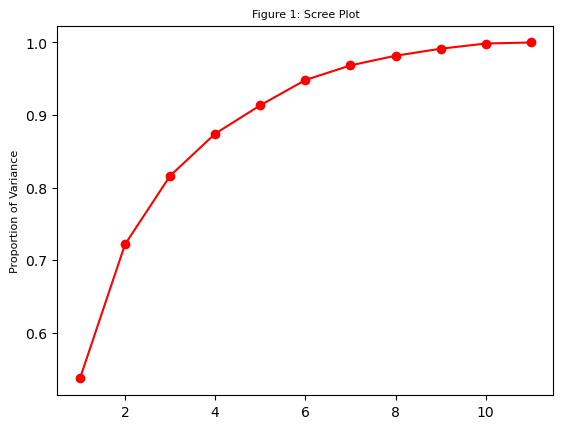

In [63]:
pca = PCA(n_components=len(models))
X_scaled = StandardScaler().fit_transform(PSE_data[models])
X_pca = pca.fit_transform(X_scaled)

prop_var = np.cumsum(pca.explained_variance_ratio_)

PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.savefig("Scree_TwoPSE_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()

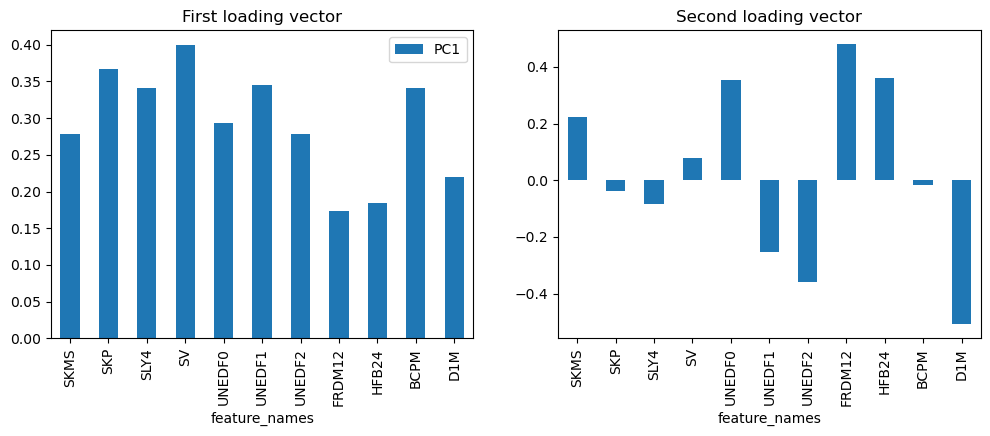

In [64]:
loadings = loading_matrix(pca.components_, pca.n_features_, models)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
loadings.iloc[:, :1].plot(kind = "bar", title = "First loading vector", ax = ax1)
loadings.iloc[:, 1].plot(kind = "bar", title = "Second loading vector", ax = ax2)
plt.savefig("PC_TwoPSE_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()

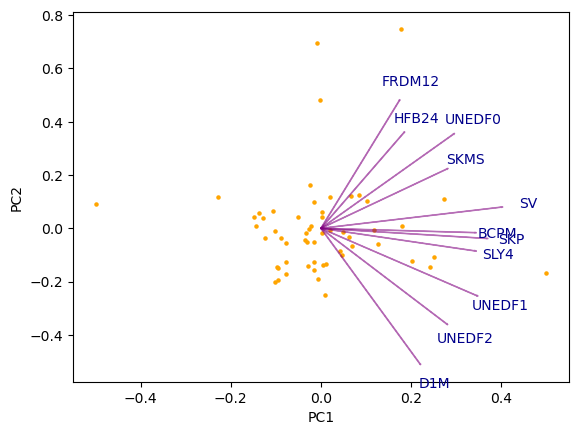

In [65]:
biplot(X_pca, np.transpose(pca.components_),list(loadings.index))
plt.savefig("Biplot_TwoPSE_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()

# TwoNSE residual analysis - raw

In [66]:
models = ['SKMS', 'SKP', 'SLY4', 'SV', 'UNEDF0', 'UNEDF1', 'UNEDF2', 'FRDM12', 'HFB24', 'BCPM', 'D1M']
observable = "TwoNSE"
NSE_data = h5_data_loader(models, observable, residuals = True)
NSE_data = NSE_data.dropna()

model_summary = {}
model_summary["res_mean"] = NSE_data[models].mean(axis = 0).values
model_summary["res_std"] = NSE_data[models].std(axis = 0).values
model_summary["rmse"] = np.sqrt(np.mean(NSE_data[models] ** 2, axis = 0)).values

model_summary_df = pd.DataFrame(model_summary, index =NSE_data[models].columns )
print(model_summary_df)
#print(model_summary_df.style.to_latex())

        res_mean   res_std      rmse
SKMS   -0.964390  0.563778  1.114502
SKP    -0.379927  0.585503  0.693488
SLY4    0.104365  0.773982  0.773982
SV     -0.293261  0.493234  0.569963
UNEDF0 -0.308795  0.531420  0.610432
UNEDF1  0.034711  0.491158  0.487909
UNEDF2  0.100857  0.672354  0.673805
FRDM12 -0.179164  0.390507  0.426407
HFB24  -0.099436  0.377850  0.387379
BCPM   -0.415454  0.639855  0.758006
D1M    -0.217482  0.730574  0.755865


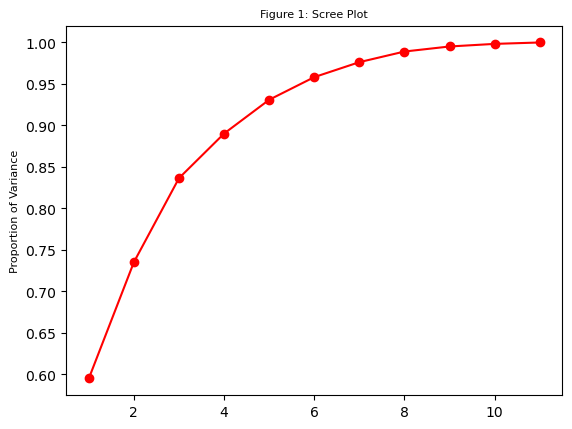

In [67]:
pca = PCA(n_components=len(models))
X_pca = pca.fit_transform(NSE_data[models])

prop_var = np.cumsum(pca.explained_variance_ratio_)
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.savefig("Scree_TwoNSE_raw.pdf", format="pdf", bbox_inches="tight")
plt.show()

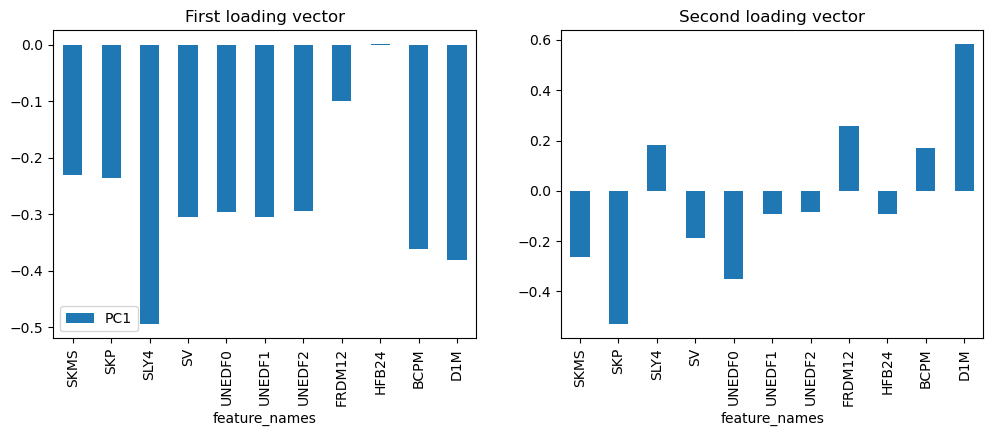

In [68]:
loadings = loading_matrix(pca.components_, pca.n_features_, models)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
loadings.iloc[:, :1].plot(kind = "bar", title = "First loading vector", ax = ax1)
loadings.iloc[:, 1].plot(kind = "bar", title = "Second loading vector", ax = ax2)
plt.savefig("PC_TwoNSE_raw.pdf", format="pdf", bbox_inches="tight")
plt.show()

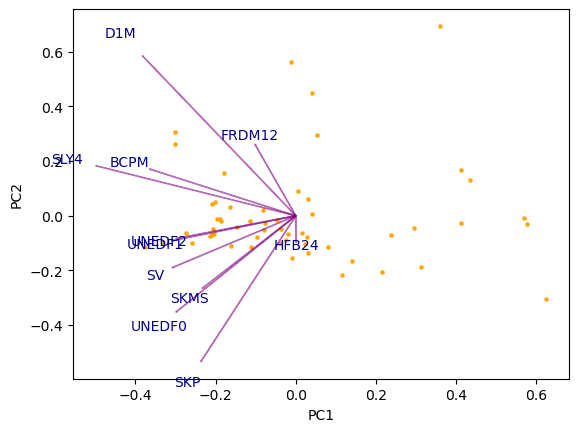

In [69]:
biplot(X_pca, np.transpose(pca.components_),list(loadings.index))
plt.savefig("Biplot_TwoNSE_raw.pdf", format="pdf", bbox_inches="tight")
plt.show()

# TwoNSE residual analysis - normalized

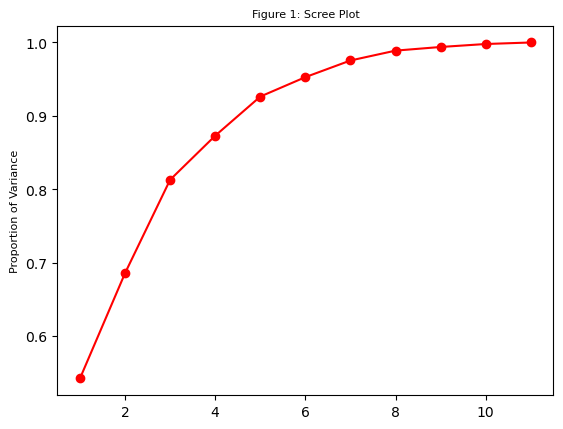

In [70]:
pca = PCA(n_components=len(models))
X_scaled = StandardScaler().fit_transform(NSE_data[models])
X_pca = pca.fit_transform(X_scaled)

prop_var = np.cumsum(pca.explained_variance_ratio_)
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.savefig("Scree_TwoNSE_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()

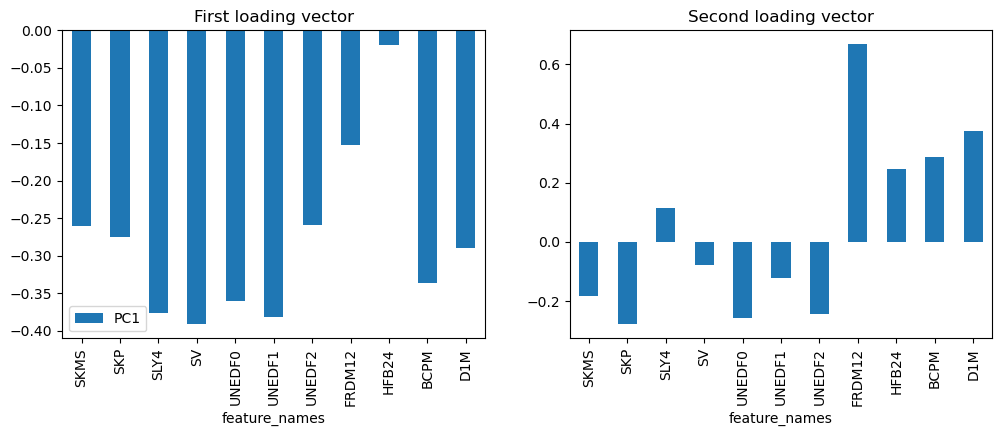

In [71]:
loadings = loading_matrix(pca.components_, pca.n_features_, models)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
loadings.iloc[:, :1].plot(kind = "bar", title = "First loading vector", ax = ax1)
loadings.iloc[:, 1].plot(kind = "bar", title = "Second loading vector", ax = ax2)
plt.savefig("PC_TwoNSE_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()

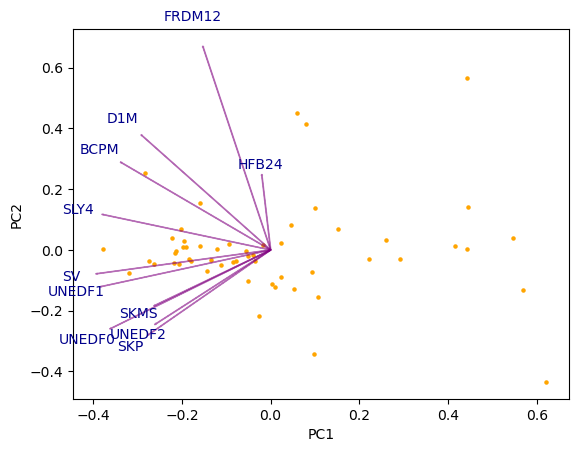

In [72]:
biplot(X_pca, np.transpose(pca.components_),list(loadings.index))
plt.savefig("Biplot_TwoNSE_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()

# PCA on all - normalized

In [87]:
models = ['SKMS', 'SKP', 'SLY4', 'SV', 'UNEDF0', 'UNEDF1', 'UNEDF2', 'FRDM12', 'HFB24', 'BCPM', 'D1M']
observable = "TwoNSE"
NSE_data = h5_data_loader(models, observable, residuals = True)
NSE_data = NSE_data.dropna()

observable = "TwoPSE"
PSE_data = h5_data_loader(models, observable, residuals = True)
PSE_data = PSE_data.dropna()

observable = "BE"
BE_data = h5_data_loader(models, observable, residuals = True)

All_data = pd.concat([BE_data, NSE_data, PSE_data], ignore_index = True)

model_summary = {}
model_summary["res_mean"] = All_data[models].mean(axis = 0).values
model_summary["res_std"] = All_data[models].std(axis = 0).values
model_summary["rmse"] = np.sqrt(np.mean(NSE_data[models] ** 2, axis = 0)).values

model_summary_df = pd.DataFrame(model_summary, index =All_data[models].columns )
print(model_summary_df)
#print(model_summary_df.style.to_latex())

        res_mean   res_std      rmse
SKMS    0.915464  4.460722  1.114502
SKP     0.554944  2.329691  0.693488
SLY4    1.572998  3.617692  0.773982
SV      0.909782  1.885552  0.569963
UNEDF0  0.089979  1.080273  0.610432
UNEDF1  0.263640  1.407721  0.487909
UNEDF2  0.161492  1.367070  0.673805
FRDM12 -0.033362  0.563124  0.426407
HFB24   0.049171  0.497052  0.387379
BCPM    0.418916  1.202108  0.758006
D1M     1.604380  2.590271  0.755865


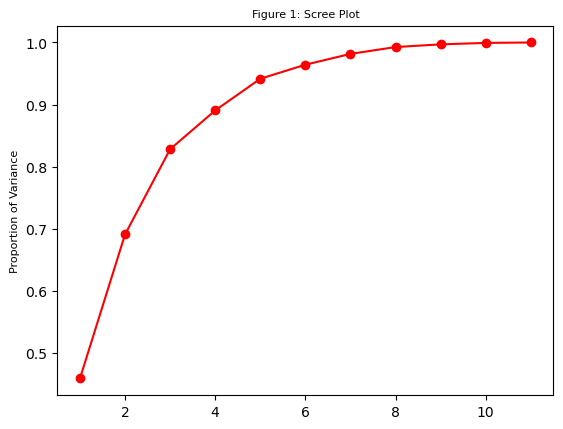

In [88]:
pca = PCA(n_components=len(models))
X_scaled = StandardScaler().fit_transform(All_data[models])
X_pca = pca.fit_transform(X_scaled)
#X_pca = pca.fit_transform(All_data[models])

prop_var = np.cumsum(pca.explained_variance_ratio_)
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.savefig("Scree_All_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()

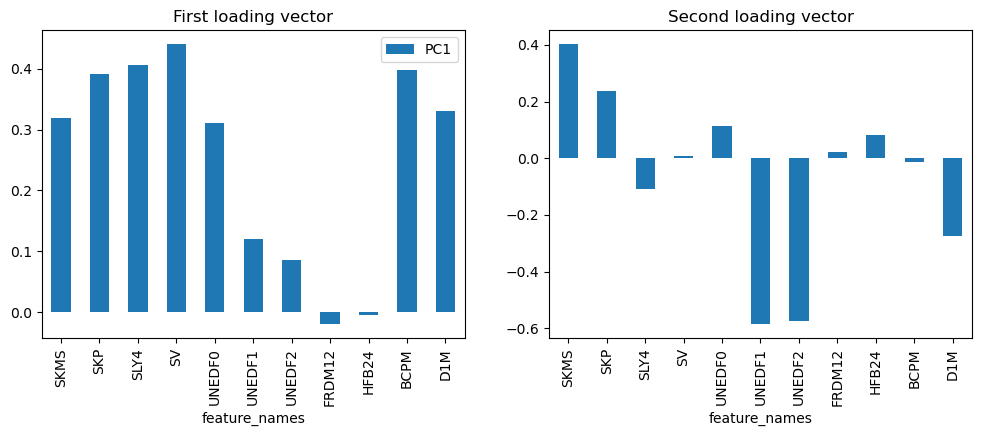

In [89]:
loadings = loading_matrix(pca.components_, pca.n_features_, models)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
loadings.iloc[:, :1].plot(kind = "bar", title = "First loading vector", ax = ax1)
loadings.iloc[:, 1].plot(kind = "bar", title = "Second loading vector", ax = ax2)
plt.savefig("PC_All_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()

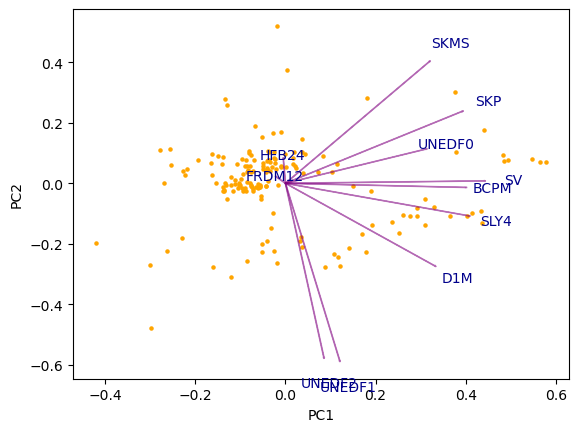

In [90]:
biplot(X_pca, np.transpose(pca.components_),list(loadings.index))
plt.savefig("Biplot_All_normalized.pdf", format="pdf", bbox_inches="tight")
plt.show()